**Abstract**

The term “liver disease” refers to any of several conditions that can affect and damage your liver. Over time, liver disease can cause cirrhosis (scarring). As more scar tissue replaces healthy liver tissue, the liver can no longer function properly. Left untreated, liver disease can lead to liver failure and liver cancer.

This  data  set  contains  416  liver  patient  records  and  167  non-liver  patient  records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90".

In [1]:
# Making the necessary imports
import pandas as pd
from pycaret.datasets import get_data

# Reading in the dataset
dataset = pd.read_csv("indian_liver_patient.csv")
dataset.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [2]:
# Fixing the dataset column to 0 instead of 1 for no presence of liver disease and 1 instead of 2 for presence of liver disease
dataset['Dataset']=dataset['Dataset'].apply(lambda x: 0 if x == 1 else x)
dataset['Dataset']=dataset['Dataset'].apply(lambda x: 1 if x == 2 else x)

In [3]:
# Making sure the dataset is fixed
dataset.head(100)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
95,75,Male,0.9,0.2,282,25,23,4.4,2.2,1.00,0
96,39,Male,3.8,1.5,298,102,630,7.1,3.3,0.80,0
97,39,Male,6.6,3.0,215,190,950,4.0,1.7,0.70,0
98,18,Male,0.6,0.1,265,97,161,5.9,3.1,1.10,0


In [4]:
# Checking the shape of dataset
dataset.shape

(583, 11)

In [5]:
# Checking for null values in the datasets
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
# Creating the training dataset with 95% of the original dataset used in the training dataset
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
# Creating the testing dataset by dropping the indexes of the data used in the training dataset
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (554, 11)
Unseen Data For Predictions: (29, 11)


In [7]:
# Setting up the PyCaret environment
from pycaret.classification import *

In [8]:
# Using the PyCaret setup function to preprocess the data by imputing the numerical data with the mean and the categorial data with the mode,running PCA, etc.
exp_clf101 = setup(data = data, target = 'Dataset', pca=True, session_id=123) 

,Description,Value
0,session_id,123
1,Target,Dataset
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(554, 11)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

In [9]:
# Comparing a myriad of models after fitting the data into the models using the compare_models() method (the best performance between models is highlighted)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7132,0.7526,0.2205,0.6317,0.2961,0.1689,0.2181,0.1790
ridge,Ridge Classifier,0.7029,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040
lda,Linear Discriminant Analysis,0.7029,0.7405,0.0000,0.0000,0.0000,0.0000,0.0000,0.0030
dummy,Dummy Classifier,0.7029,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020
gbc,Gradient Boosting Classifier,0.6982,0.7216,0.3750,0.4908,0.4224,0.2244,0.2292,0.0190
rf,Random Forest Classifier,0.6901,0.7339,0.3856,0.4722,0.4219,0.2153,0.2180,0.0880
et,Extra Trees Classifier,0.6898,0.7242,0.4015,0.4821,0.4323,0.2234,0.2280,0.0770
lightgbm,Light Gradient Boosting Machine,0.6824,0.7252,0.4053,0.4583,0.4199,0.2080,0.2129,0.0100
ada,Ada Boost Classifier,0.6642,0.7094,0.3530,0.4220,0.3721,0.1531,0.1580,0.0230
dt,Decision Tree Classifier,0.6561,0.5924,0.4348,0.4333,0.4291,0.1853,0.1877,0.0030


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Creating a model after comparing models in the previous cell by fitting the data into the model and training the model
# Using k-fold cross-validation with k=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7949,0.8799,0.5455,0.6667,0.6000,0.4639,0.4681
1,0.6667,0.6883,0.0909,0.2500,0.1333,-0.0201,-0.0241
2,0.6410,0.7130,0.1667,0.3333,0.2222,0.0215,0.0237
3,0.7179,0.8117,0.0833,1.0000,0.1538,0.1118,0.2433
4,0.7692,0.8889,0.2500,1.0000,0.4000,0.3158,0.4330
5,0.7179,0.6389,0.1667,0.6667,0.2667,0.1637,0.2245
6,0.6923,0.7469,0.0833,0.5000,0.1429,0.0602,0.0969
7,0.7105,0.7104,0.2727,0.5000,0.3529,0.1868,0.2010
8,0.6579,0.6061,0.3636,0.4000,0.3810,0.1453,0.1456


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

In [11]:
# Tuning the model using the tune_model method to increase the performance of the model

tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7949,0.8799,0.5455,0.6667,0.6000,0.4639,0.4681
1,0.6667,0.6883,0.0909,0.2500,0.1333,-0.0201,-0.0241
2,0.6410,0.7130,0.1667,0.3333,0.2222,0.0215,0.0237
3,0.7179,0.8117,0.0833,1.0000,0.1538,0.1118,0.2433
4,0.7692,0.8889,0.2500,1.0000,0.4000,0.3158,0.4330
5,0.7179,0.6389,0.1667,0.6667,0.2667,0.1637,0.2245
6,0.6923,0.7469,0.0833,0.5000,0.1429,0.0602,0.0969
7,0.7105,0.7104,0.2727,0.5000,0.3529,0.1868,0.2010
8,0.6579,0.6061,0.3636,0.4000,0.3810,0.1453,0.1456


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

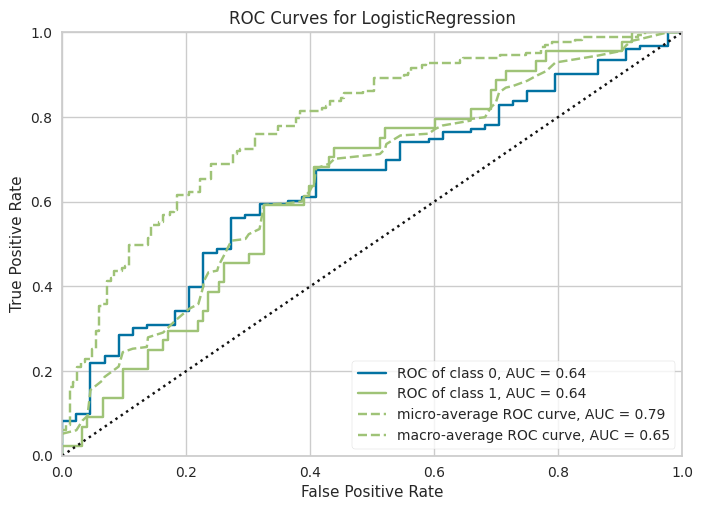

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

In [12]:
# Plotting the ROC Curve 
plot_model(tuned_lr, plot = 'auc')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

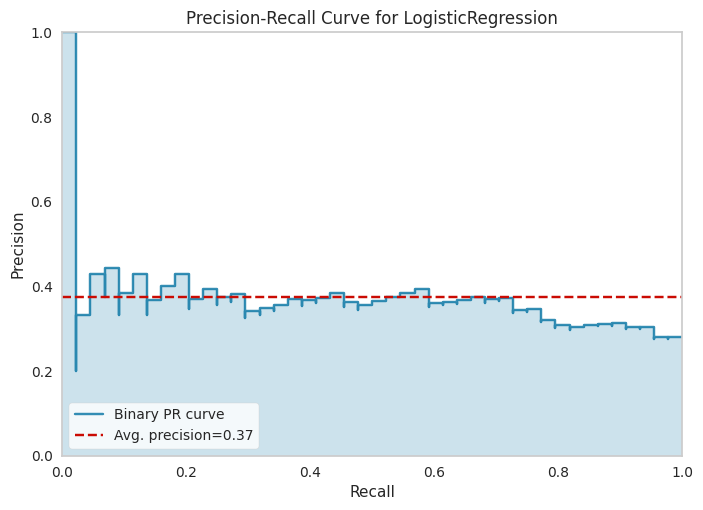

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

In [13]:
# Plotting the Precision/Recall curve
plot_model(tuned_lr, plot = 'pr')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

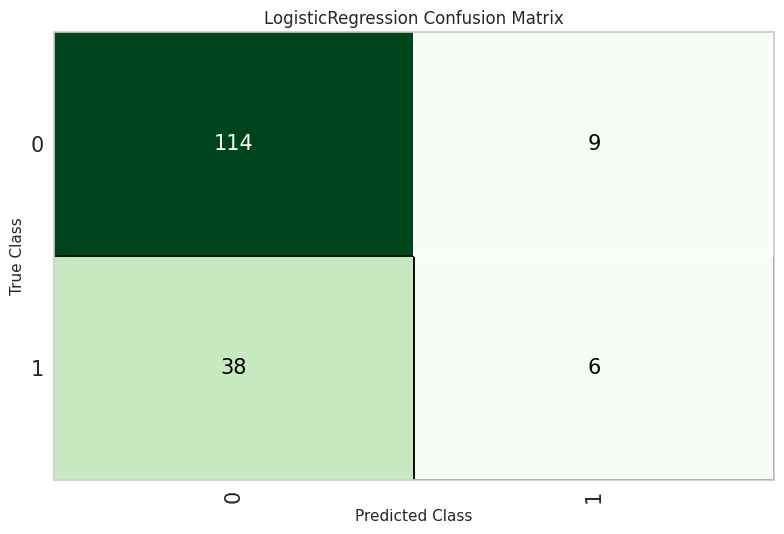

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

In [14]:
# Creating a Confusion Matrix

plot_model(tuned_lr, plot = 'confusion_matrix')

In [15]:
# Evaluating the model and checking hyperparameters

evaluate_model(tuned_lr)

,Parameters
C,7.863
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
# Predicting to check the score (probability of the liver disease prediction on a person is correct)
predict_model(tuned_lr)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7186,0.6436,0.1364,0.4000,0.2034,0.0802,0.0974


,Component_1,Component_2,Component_3,Dataset,Label,Score
0,58.559429,401.115784,23.037151,0,0,0.9611
1,-140.490204,-101.157829,10.511772,1,1,0.5321
2,82.814972,-24.273121,-7.405005,0,0,0.9372
3,-73.953873,-49.717274,1.657587,0,0,0.6909
4,86.298798,288.913879,-68.487297,0,0,0.9796
...,...,...,...,...,...,...
162,-119.961418,-7.092561,24.447971,1,0,0.5570
163,-103.140419,-63.539574,16.222479,0,0,0.5852
164,157.528976,665.961060,18.636866,0,0,0.9931
165,99.212303,-100.957016,21.285782,0,0,0.9257


In [17]:
# Predicting on testing/unseen data to see the scores (probabilities of correct prediction)

unseen_predictions = predict_model(tuned_lr, data=data_unseen)
unseen_predictions.head()

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8276,0.7900,0.0000,0.0000,0.0000,-0.0584,-0.0756


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Label,Score
0,73,Male,1.8,0.9,220,20,43,6.5,3.0,0.8,0,0,0.6084
1,55,Male,0.8,0.2,290,139,87,7.0,3.0,0.7,0,0,0.9109
2,51,Male,0.7,0.1,180,25,27,6.1,3.1,1.0,0,0,0.5389
3,51,Male,2.9,1.2,189,80,125,6.2,3.1,1.0,0,0,0.8072
4,51,Male,4.0,2.5,275,382,330,7.5,4.0,1.1,0,0,0.9982


In [18]:
# Saving the model
save_model(tuned_lr,'tuned_lr_Model')

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/usr/local/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 116] Stale file handle
Call stack:
  File "/usr/local/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
    app.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/shared-libs/python3.9/py-core/lib/python3.9/site-pa

(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Dataset',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                        random_state=123,
                                                        target='Dataset',
                                                        variance_retained_or_number_of_components=None)),
                 ['t

In [22]:
%%writefile app.py
 
# Importing the necessary function
import pickle
import streamlit as st
 
# Loading the trained model
pickle_in = open('tuned_lr_Model.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
# Making sure the model can make a prediction and give output without crashing
@st.cache()
  
# Defining a function which will take user inputs, pre-process the user inputs, and make a prediction of whether the patient has kidney disease
def prediction(Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio):   
    # Pre-processing user input    
    if Gender == "Female":
        Gender = 0
    else:
        Gender = 1   
    # Making predictions 
    prediction = classifier.predict([[Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio]]) 
    if prediction == 0:
        pred = 'Liver Disease not detected'
    else:
        pred = 'Liver Disease detected'
    return pred
       
# Creating a function to create the GUI (Graphical User Interface), take the user input, processing the user input, and displaying the prediction on the screen
def main():       
    # Creating the frontend elements of the website 
    html_temp = """ 
    <div style ="background-color:red;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Liver Disease Predictor</h1> 
    </div> 
    """
    # Displaying the frontend aspect
    st.markdown(html_temp, unsafe_allow_html = True)   
    # Creating boxes to ask the user for the input
    Gender = st.selectbox('Gender',("Female","Male")) 
    Age = st.number_input( "Age" )
    Total_Bilirubin = st.number_input( "Total Bilirubin" )
    Direct_Bilirubin = st.number_input( "Direct Bilirubin" )
    Alkaline_Phosphotase = st.number_input( "Alkaline Phosphotase" )
    Alamine_Aminotransferase = st.number_input( "Alamine Aminotransferase" )
    Aspartate_Aminotransferase = st.number_input( "Aspartate Aminotransferase" )
    Total_Protiens = st.number_input( "Total Protiens" )
    Albumin = st.number_input( "Albumin" )
    Albumin_and_Globulin_Ratio = st.number_input( "Albumin and Globulin_Ratio" )
    result =""
    # Creating a predict button to create a prediction and store the prediction
    if st.button("Predict"): 
        result = prediction(Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio) 
        st.success('Report Results: {}'.format(result))
            
if __name__=='__main__': 
    main()

Writing app.py


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2371182b-9962-4f00-bdcb-9cdff8581264' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>